# Toronto Historical Weather Web Scraping
This is my first web scraping project.

In [3]:
#Import libraries for webscraping
import urllib.request
from bs4 import BeautifulSoup
#Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Government of Canada Website 
page = 'http://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459&timeframe=2&StartYear=1840&EndYear=2018&Day=7&Year=2018&Month=1#'


In [5]:
#Query the website
f=urllib.request.urlopen(page).read()

In [6]:
#Parse the page using beautiful soup
soup = BeautifulSoup(f, 'html.parser')
#un-comment the following line to see the scraped html
#print(soup.prettify)

In [1]:
#Look through the html, it's clear that the year and month are both contained under the a sepcific class name. and we only need the first section of that <div> tag. Let's print the parsed result, and noticed we have successfully isolated the section that contains information on both the year and the month of the data.

In [7]:
#Find the section that contains the year and the month
option = soup.find_all('div', class_='col-md-6 col-sm-6 col-xs-6 text-center mrgn-tp-md mrgn-bttm-md')
option=option[0]
option=option.find_all('option', selected=True)
print(option)

[<option selected="selected" value="2018">2018</option>, <option selected="selected" value="1">January</option>]


In [26]:
#Let's get the year and month values out of the resultSet.

In [8]:
year=option[0]
year=year.find(text=True)
print(year)

2018


In [9]:
month=option[1]
month=month.find(text=True)
print(month)

January


In [27]:
# Let's find the table that contains all the data. Since there are only one table on this page, we can use soup.find_all('table'). Otherwise we could specify the table name. 

In [10]:
#Find the table
#table = soup.find_all('div', class_='table-responsive')
table = soup.find_all('table')

In [28]:
#Parse through the table and extract the column headers. 

In [11]:
th_all = soup.find_all('th')
result = []
for th in th_all:
    result.append(th.find('abbr', text=True))

title=[]
for abbr in result:
    if abbr is not None:
        title.append(abbr.string)
    
print(title)

['Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'mm', 'cm', 'Total Precip', 'Snow on Grnd', 'Dir of Max Gust', 'Spd of Max Gust', 'Avg', 'Xtrm']


In [29]:
#As we can see, there are a couple of values not quite as expect, so let's clean it up a bit. 
#more specifically, mm is supposed to be Total Rain, and cm is supposed to be Total Snow. We'll leave Avg and Xtrm for now.

In [12]:
#clean up title
for i in range(len(title)):
    if title[i]=='mm':
        title[i]="Total Rain"
    elif title[i]=='cm':
        title[i]="Total Snow"
print(title)

['Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain', 'Total Snow', 'Total Precip', 'Snow on Grnd', 'Dir of Max Gust', 'Spd of Max Gust', 'Avg', 'Xtrm']


In [30]:
#Let's grab table row data and put them into an array. We will separate them into data and date.

In [13]:
table_body = soup.find('tbody')
tr = table_body.find_all('tr')
td=[]
date=[]
data=[]
for row in tr:
    d=[]
    for r in row.find_all('td'):
        date.append(r.find('abbr'))
        d.append(r.string)
    data.append(d)
print(data)

[[], [None, '-8.7', '-21.3', '-15.0', '33.0', '0.0', '0.0', None, None, '11', '28', '54'], [None, '-7.8', '-13.1', '-10.5', '28.5', '0.0', '0.0', '1.0', '1.0', '11', '24', '59'], [None, '-6.3', '-13.5', '-9.9', '27.9', '0.0', '0.0', None, None, '10', '22', '44'], [None, '-8.9', '-20.5', '-14.7', '32.7', '0.0', '0.0', None, None, '9', '32', '65'], [None, '-15.0', '-23.0', '-19.0', '37.0', '0.0', '0.0', None, None, '8', '31', '50'], [None, '-16.4', '-23.5', '-20.0', '38.0', '0.0', '0.0', '0.0', '0.0', '7', '30', '32'], [None, '-2.0', '-20.9', '-11.5', '29.5', '0.0', '0.2', '0.2', '0.4', '7', '22', '52'], [None, '2.2', '-2.6', '-0.2', '18.2', '0.0', '0.6', '4.0', '4.2', '9', '25', '50'], [None, '0.6', '-2.5', '-1.0', '19.0', '0.0', '0.0', None, None, '7', '31', '39'], [None, '6.6', '-4.9', '0.9', '17.1', '0.0', '2.6', '0.0', '2.6', '6', '\xa0', '<31'], [None, '12.6', '4.5', '8.6', '9.4', '0.0', '7.0', '0.0', '7.0', '2', '21', '37'], [None, '12.2', '-12.6', '-0.2', '18.2', '0.0', '10.2', '

In [14]:
print(type(date[0])); print(type(data[0]))

<class 'bs4.element.Tag'>
<class 'list'>


In [33]:
#Notice that elements of data are lists as desired, but elements of date are tags. Let's clean up date arrays, 
#and change them from string to datetime values.

In [15]:
#clean date arrays
t=[]
for d in date:
  if d is not None:
    t.append(d.get('title'))
print(t)

['January 1, 2018', 'January 2, 2018', 'January 3, 2018', 'January 4, 2018', 'January 5, 2018', 'January 6, 2018', 'January 7, 2018', 'January 8, 2018', 'January 9, 2018', 'January 10, 2018', 'January 11, 2018', 'January 12, 2018', 'January 13, 2018', 'January 14, 2018', 'January 15, 2018', 'January 16, 2018']


In [16]:
from datetime import datetime
date=[]
for j in t:
    date.append(datetime.strptime(j, '%B %d, %Y'))
print(date)

[datetime.datetime(2018, 1, 1, 0, 0), datetime.datetime(2018, 1, 2, 0, 0), datetime.datetime(2018, 1, 3, 0, 0), datetime.datetime(2018, 1, 4, 0, 0), datetime.datetime(2018, 1, 5, 0, 0), datetime.datetime(2018, 1, 6, 0, 0), datetime.datetime(2018, 1, 7, 0, 0), datetime.datetime(2018, 1, 8, 0, 0), datetime.datetime(2018, 1, 9, 0, 0), datetime.datetime(2018, 1, 10, 0, 0), datetime.datetime(2018, 1, 11, 0, 0), datetime.datetime(2018, 1, 12, 0, 0), datetime.datetime(2018, 1, 13, 0, 0), datetime.datetime(2018, 1, 14, 0, 0), datetime.datetime(2018, 1, 15, 0, 0), datetime.datetime(2018, 1, 16, 0, 0)]


In [35]:
#Let's clean up the scarped data by removing any empty elements, and remove the extra rows that contains mainly 
#None values.

In [17]:
#clean up data array
for entry in data:
    if entry == []:
        data.remove(entry)

for entry in data:
    if len(entry)>11:
        entry.pop(0)

#There should be as many rows as the number dates
for rm in range(len(data)-len(date)):
    data.pop(len(data)-1)
    rm -=1
print(data)

[['-8.7', '-21.3', '-15.0', '33.0', '0.0', '0.0', None, None, '11', '28', '54'], ['-7.8', '-13.1', '-10.5', '28.5', '0.0', '0.0', '1.0', '1.0', '11', '24', '59'], ['-6.3', '-13.5', '-9.9', '27.9', '0.0', '0.0', None, None, '10', '22', '44'], ['-8.9', '-20.5', '-14.7', '32.7', '0.0', '0.0', None, None, '9', '32', '65'], ['-15.0', '-23.0', '-19.0', '37.0', '0.0', '0.0', None, None, '8', '31', '50'], ['-16.4', '-23.5', '-20.0', '38.0', '0.0', '0.0', '0.0', '0.0', '7', '30', '32'], ['-2.0', '-20.9', '-11.5', '29.5', '0.0', '0.2', '0.2', '0.4', '7', '22', '52'], ['2.2', '-2.6', '-0.2', '18.2', '0.0', '0.6', '4.0', '4.2', '9', '25', '50'], ['0.6', '-2.5', '-1.0', '19.0', '0.0', '0.0', None, None, '7', '31', '39'], ['6.6', '-4.9', '0.9', '17.1', '0.0', '2.6', '0.0', '2.6', '6', '\xa0', '<31'], ['12.6', '4.5', '8.6', '9.4', '0.0', '7.0', '0.0', '7.0', '2', '21', '37'], ['12.2', '-12.6', '-0.2', '18.2', '0.0', '10.2', '3.4', '14.2', '3', '32', '67'], ['-11.6', '-16.9', '-14.3', '32.3', '0.0', '

In [36]:
#Remember we left some extra headers in title? let's get rid of those.

In [18]:
for rm in range(len(title)-len(data[0])):
    title.pop(len(title)-1)
    rm-=1
print(title)

['Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain', 'Total Snow', 'Total Precip', 'Snow on Grnd', 'Dir of Max Gust', 'Spd of Max Gust']


In [37]:
#Use Pandas, let's put everything together into a dataframe. notice that we the data are shifted

In [19]:
#Construct dataframe for scraped data
df = pd.DataFrame(data=data,index=date,columns=title)
print(type(df.iloc[0][0]))

<class 'bs4.element.NavigableString'>


In [38]:
#Notice that the values are in string format. so let's rebuild this dataframe. 

In [20]:
df=df.apply(pd.to_numeric, errors="coerce")
df.dtypes

Max Temp           float64
Min Temp           float64
Mean Temp          float64
Heat Deg Days      float64
Cool Deg Days      float64
Total Rain         float64
Total Snow         float64
Total Precip       float64
Snow on Grnd         int64
Dir of Max Gust    float64
Spd of Max Gust    float64
dtype: object

In [39]:
#Yes!! it's in float64, now we're good. let's print df and plot it

In [21]:
print(df)

            Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
2018-01-01      -8.7     -21.3      -15.0           33.0            0.0   
2018-01-02      -7.8     -13.1      -10.5           28.5            0.0   
2018-01-03      -6.3     -13.5       -9.9           27.9            0.0   
2018-01-04      -8.9     -20.5      -14.7           32.7            0.0   
2018-01-05     -15.0     -23.0      -19.0           37.0            0.0   
2018-01-06     -16.4     -23.5      -20.0           38.0            0.0   
2018-01-07      -2.0     -20.9      -11.5           29.5            0.0   
2018-01-08       2.2      -2.6       -0.2           18.2            0.0   
2018-01-09       0.6      -2.5       -1.0           19.0            0.0   
2018-01-10       6.6      -4.9        0.9           17.1            0.0   
2018-01-11      12.6       4.5        8.6            9.4            0.0   
2018-01-12      12.2     -12.6       -0.2           18.2            0.0   
2018-01-13     -11.6     

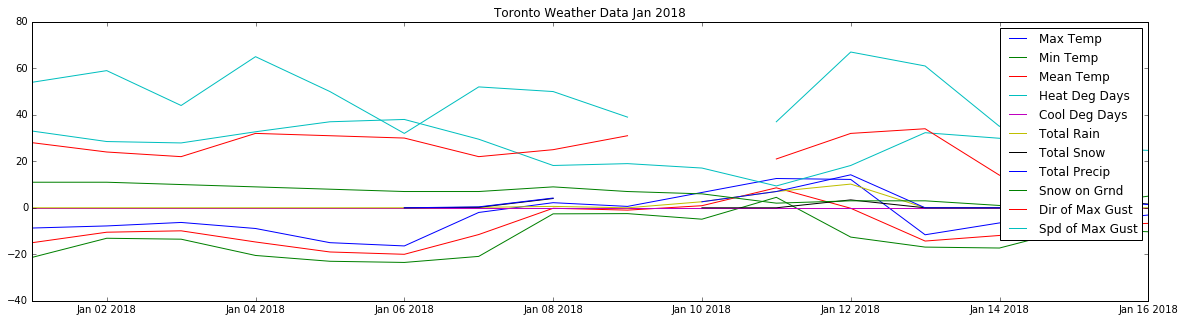

In [22]:
plt.figure(figsize=(20, 5)); plt.plot(df);plt.legend(title);plt.title('Toronto Weather Data Jan 2018');

In [40]:
#That looks a bit messy. Let's only plot Max Temp and Min Temp in a bar chart.

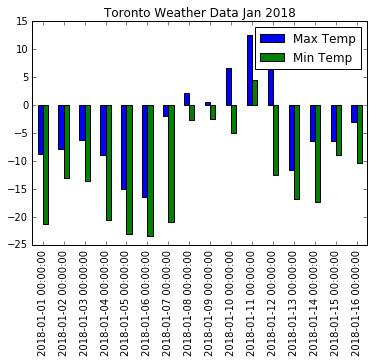

In [23]:
plt.figure(figsize=(10, 5)); df.plot(y=['Max Temp', 'Min Temp'],use_index=True, kind='bar'); 
plt.legend(title);plt.title('Toronto Weather Data Jan 2018');

In [41]:
#Let's try some interactive plots

In [24]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [25]:
trace1 = go.Bar(
    x=df.index,
    y=df['Max Temp'],
    name='Max Temp',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)
trace2 = go.Bar(
    x=df.index,
    y=df['Min Temp'],
    name='Min Temp',
    marker=dict(
        color='rgb(178,255,102)',
        line=dict(
            color='rgb(76,153,0)',
            width=1.5,
        )
    ),
    opacity=0.6
)

trace3 = go.Scatter(
    x = df.index,
    y = df['Mean Temp'],
    name='Mean Temp',
    line = dict(
        color = ('rgb(255, 175, 102)'),
        width = 4,
        dash = 'dot')
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Toronto Weather Data Jan 2018'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='WeatherScrape')